# Проект "Рынок заведений общественного питания Москвы"

**Оглавление:**
- [Общая информация](#intro)
- [Цель проекта](#purpose)
- [План работы](#plan)
- [Предобработка данных](#processing)
- [Анализ данных](#analysis)
    * [Категории заведений ](#category)
    * [Количество посадочных мест  ](#seats)
    * [ Соотношение сетевых и несетевых заведений ](#fraction)
    * [Категории заведений чаще являющимися сетевыми ](#fraction_category)
    * [Tоп-15 популярных сетей в Москве  ](#top15)
    * [География объектов питания ](#locality)
    * [Распределение средних рейтингов по категориям заведений ](#rating)
    * [Фоновая картограмма (хороплет) со средним рейтингом заведений каждого района ](#choropleth_rating)
    * [Карта заведений ](#map)
    * [Топ-15 улиц по количеству заведений ](#top15_sreet)
    * [Улицы с одним заведением ](#alone_sreet)
    * [Анализ среднего чека заведения по административным округам](#avg_district)
    * [Зависимость среднего чека и рейтинга заведения ](#avg_rating)
    * [Вывод ](#output)
- [Детализация исследование: открытие кофейни](#open)
- [Вывод](#conclusion)

## Общая информация <a id='intro'></a>

### Исходные данные

 Файл moscow_places.csv. 
* name — название заведения;
* address — адрес заведения;
* category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
* hours — информация о днях и часах работы;
* lat — широта географической точки, в которой находится заведение
* lng — долгота географической точки, в которой находится заведение;
* rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
* price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
* avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
* middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
* middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
* chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
0 — заведение не является сетевым
1 — заведение является сетевым
* district — административный район, в котором находится заведение, например Центральный административный округ;
* seats — количество посадочных мест.


### Описание проекта

Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены. 
Для начала они просят вас — аналитика — подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.

## Цель проекта: <a id='purpose'></a>
* Проанализировать информацию о существующих точках общественноо питания
* Подготовить презентацию и рекомендации ля выбора инвестпроекта


## План работы: <a id='plan'></a>
* Предобработка данных
* Анализ данных


## Предобработка данных <a id='processing'></a>

In [1]:
# Импортируем библиотеки
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from folium import Map, Choropleth, Marker
import json
from folium.plugins import MarkerCluster

In [2]:
# импортируем файл с данными
data = pd.read_csv('C:/Users/user/Desktop/Work/places of Moscow/moscow_places.csv')


In [3]:
# смотрим информацию о файле
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


In [4]:
# заменяем пропуски в столбце data['hours']
data['hours'] = data['hours'].fillna('unknown')

В данных содержатся пропуски, так как нельзя представить логичной замены, а объем пропусков слишком велик оставляем как есть. Эти пропуски необходимо учитывать при дальнейшем исследовании

In [5]:
# смотрим общий вид данных
data.head(5)

name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats  
0                NaN      0    NaN  
1                NaN      0    4.0  
2                NaN      0   45.0  
3              170.0      0    NaN  
4                NaN      1  148.0

In [6]:
#  Проверяем исходники на явные дубликаты
data.duplicated().sum()

0

In [7]:
# Проверяем наличие дубликатов в столбцах 'address' и 'name'
len(data[data.duplicated(['address','name'])])

0

In [8]:
# создаем столбец с названиями улиц
data['street'] = data['address'].apply(lambda x: x.split(',')[1]).str.strip()
data['street'].head(5)

0              улица Дыбенко
1              улица Дыбенко
2         Клязьминская улица
3    улица Маршала Федоренко
4        Правобережная улица
Name: street, dtype: object

In [9]:
# Создаtv столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7):
def around(row):
    if 'круглосуточно' in row['hours'] and 'ежедневно' in row['hours']:
        return 'True'
    else:
        return 'False'
data['24/7'] = data.apply(around, axis=1)
data['24/7']

0       False
1       False
2       False
3       False
4       False
        ...  
8401    False
8402    False
8403     True
8404     True
8405     True
Name: 24/7, Length: 8406, dtype: object

## Анализ данных <a id='analysis'></a>

### Категории заведений <a id='category'></a>

In [10]:
# Считаем количество заведений каждой категории
ax = data.groupby('category').agg({'category': 'unique','category': 'count'})
ax.columns=['count']
ax.sort_values(by='count')

count
category              
булочная           256
столовая           315
быстрое питание    603
пиццерия           633
бар,паб            765
кофейня           1413
ресторан          2043
кафе              2378

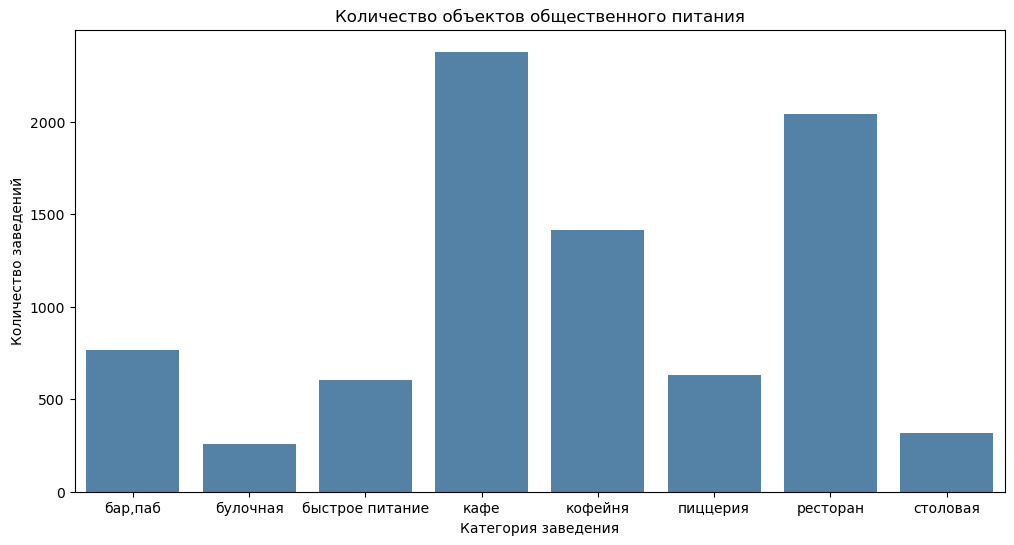

In [11]:
# строим график по полученным данным
plt.figure(figsize=(12,6))
sns.barplot(x=ax.index,y='count',data=ax, color='steelblue')
plt.title('Количество объектов общественного питания')
plt.xlabel('Категория заведения') 
plt.ylabel('Количество заведений')
plt.show()


* Наиболее распространенными являются такие категория заведений, как: кафе, ресторан, кофейня. Наименее распространены: булочная, столовая, быстрое питание.

### Количество посадочных мест <a id='seats'></a>

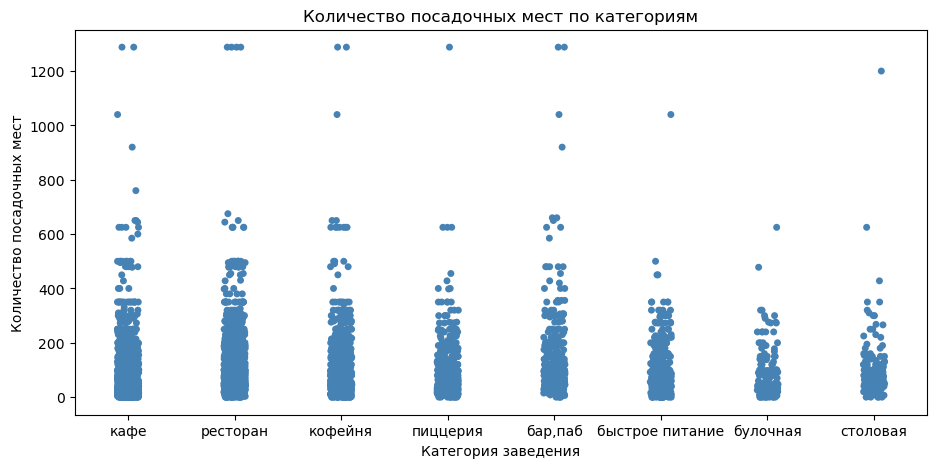

In [12]:
# строим график распределения
plt.figure(figsize=(11,5))
sns.stripplot(x='category', y='seats', data=data, color='steelblue')
plt.title('Количество посадочных мест по категориям')
plt.xlabel('Категория заведения') 
plt.ylabel('Количество посадочных мест')
plt.show()

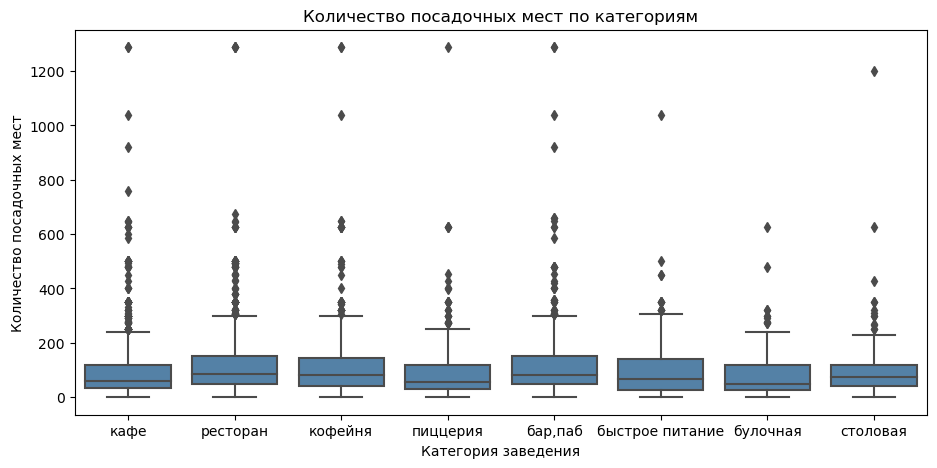

In [13]:
# строим ящик с усами
plt.figure(figsize=(11,5))
sns.boxplot(x='category', y='seats', data=data, color='steelblue')
plt.title('Количество посадочных мест по категориям')
plt.xlabel('Категория заведения') 
plt.ylabel('Количество посадочных мест')
plt.show()

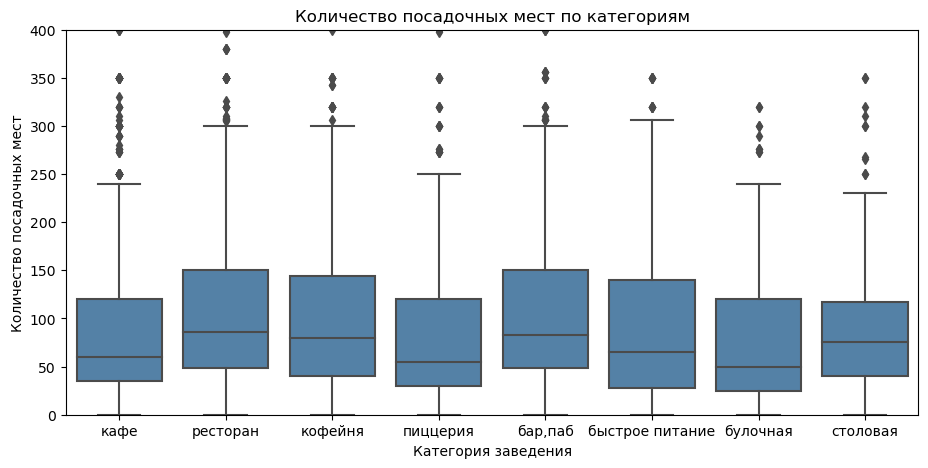

In [14]:
# меняем масштаб для большей наглядности
plt.figure(figsize=(11,5))
sns.boxplot(x='category', y='seats', data=data, color='steelblue')
plt.title('Количество посадочных мест по категориям')
plt.xlabel('Категория заведения') 
plt.ylabel('Количество посадочных мест')
plt.ylim([0, 400])
plt.show()


In [15]:
# смотрим медианное количество посадочных мест по категориям
data.groupby('category').agg({'seats': 'median'})


seats
category              
бар,паб           82.5
булочная          50.0
быстрое питание   65.0
кафе              60.0
кофейня           80.0
пиццерия          55.0
ресторан          86.0
столовая          75.5

* Изучив графики можно сделать выводы что максимальное количество мест составляет от 200 до 300 в зависимости от категори заведения. Запведения с большим числом посадочных мест являются аномалиями. Медианное число посадочных максимально в категории "ресторан" и минимально в категори "булочная".На графике распределения имеется аномальный всплеск большинства категорий около 600 посадочных мест, возможно он связан с расположением заведений в фудкортах. 

### Соотношение сетевых и несетевых заведений <a id='fraction'></a> 

In [16]:
# Считаем процент заведений
round(data['chain'].value_counts()/data['chain'].count()*100,2)

0    61.87
1    38.13
Name: chain, dtype: float64

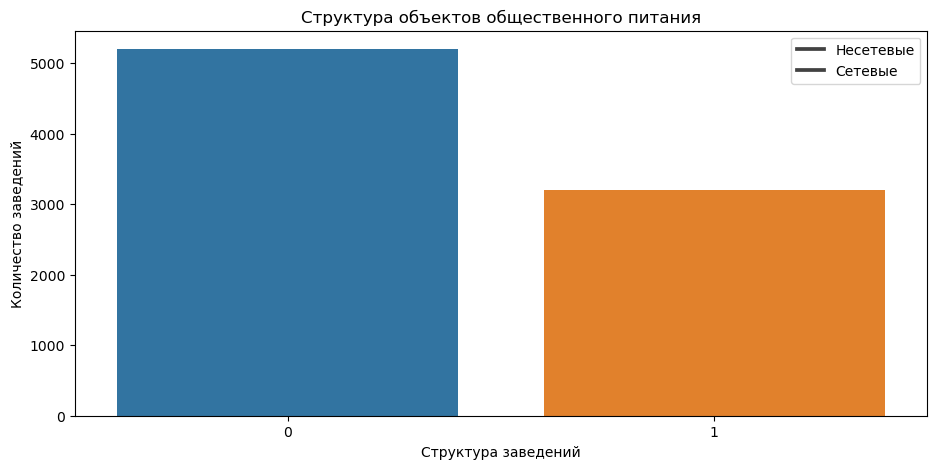

In [17]:
# строим график соотношения типов заведений
ax = data.groupby('chain', as_index=False).agg({'chain': 'value_counts'})
ax.columns=['count']
ax.sort_values(by='count')
plt.figure(figsize=(11,5))
sns.barplot(x=ax.index,y='count',data=ax)
plt.title('Структура объектов общественного питания')
plt.legend(labels = ('Несетевые', 'Сетевые'))
plt.xlabel('Структура заведений') 
plt.ylabel('Количество заведений')
plt.show()


* Большая заведений, почти 62%, являются несетевыми заведениями

### Категории заведений чаще являющимися сетевыми <a id='fraction_category'></a>

In [18]:
# смотрим количество сетевых заведений в каждой категории
chain_count=data.loc[data['chain']==1].groupby('chain').agg({'category': 'value_counts'})
gx=chain_count
gx=gx.reset_index( level = [0])
chain_count

category
chain category                 
1     кафе                  779
      ресторан              730
      кофейня               720
      пиццерия              330
      быстрое питание       232
      бар,паб               169
      булочная              157
      столовая               88

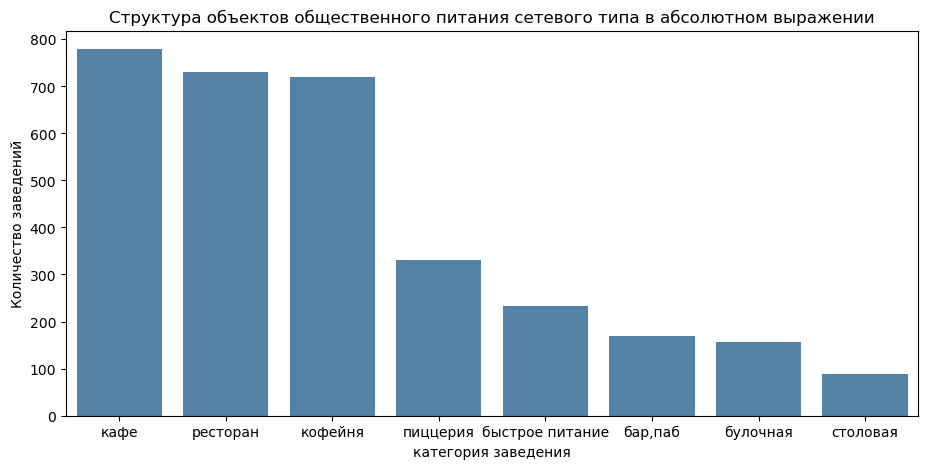

In [19]:
# строим график количества сетевых заведений в каждой категории
plt.figure(figsize=(11,5))
sns.barplot(x=gx.index,y='category',data=gx, color = 'steelblue')
plt.title('Структура объектов общественного питания сетевого типа в абсолютном выражении')
plt.xlabel('категория заведения') 
plt.ylabel('Количество заведений')
plt.show()

* Наибольшее количество заведений сетевого типа это "кафе", "ресторан", "кофейня".

In [20]:
# Считаем процент сетевых заведений
all_count=data.groupby('category').agg({'category': 'value_counts'})
percent_chain = chain_count/all_count
percent_chain.index = percent_chain.index.droplevel([2])
percent_chain.index = percent_chain.index.droplevel([0])
percent_chain.columns = ['percent']
percent_chain.sort_values(by='percent')

percent
category                 
бар,паб          0.220915
столовая         0.279365
кафе             0.327586
ресторан         0.357318
быстрое питание  0.384743
кофейня          0.509554
пиццерия         0.521327
булочная         0.613281

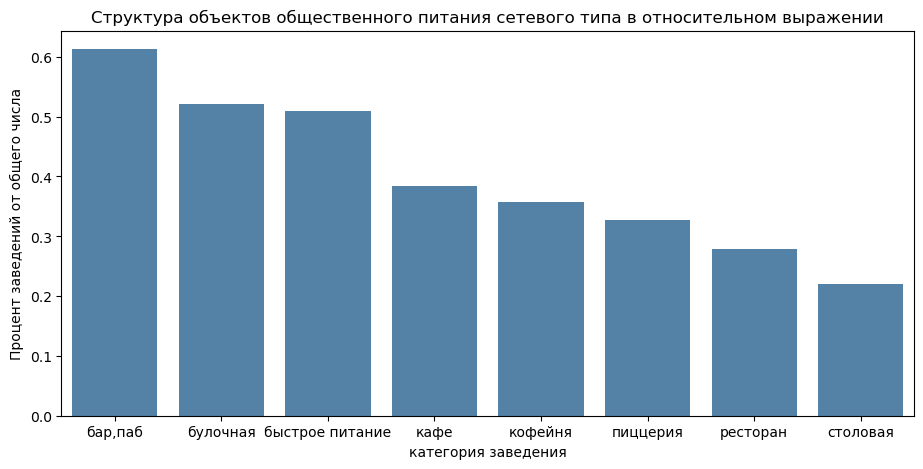

In [21]:
# строим график доли сетевых заведений в каждой категории
plt.figure(figsize=(11,5))
sns.barplot(x=percent_chain.index,y='percent',data=percent_chain.sort_values(by='percent', ascending = False), color = 'steelblue')
plt.title('Структура объектов общественного питания сетевого типа в относительном выражении')
plt.xlabel('категория заведения') 
plt.ylabel('Процент заведений от общего числа')
plt.show()

* При этом наибольший процент сетевых заведений встречается среди "булочная", "пиццерия", "кофейня".

### Tоп-15 популярных сетей в Москве <a id='top15'></a>

In [22]:
# выбираем 15 самых крупных сетевых заведений
top_chain=data.loc[data['chain']==1].groupby(['name','category']).agg({'name': 'count'})
top_chain.columns=['count']
top_chain.sort_values(by='count', ascending = False).head(15)

count
name                                category       
Шоколадница                         кофейня     119
Домино'с Пицца                      пиццерия     76
Додо Пицца                          пиццерия     74
One Price Coffee                    кофейня      71
Яндекс Лавка                        ресторан     69
Cofix                               кофейня      65
Prime                               ресторан     49
КОФЕПОРТ                            кофейня      42
Кулинарная лавка братьев Караваевых кафе         39
Теремок                             ресторан     36
CofeFest                            кофейня      31
Чайхана                             кафе         26
Буханка                             булочная     25
Drive Café                          кафе         24
Кофемания                           кофейня      22

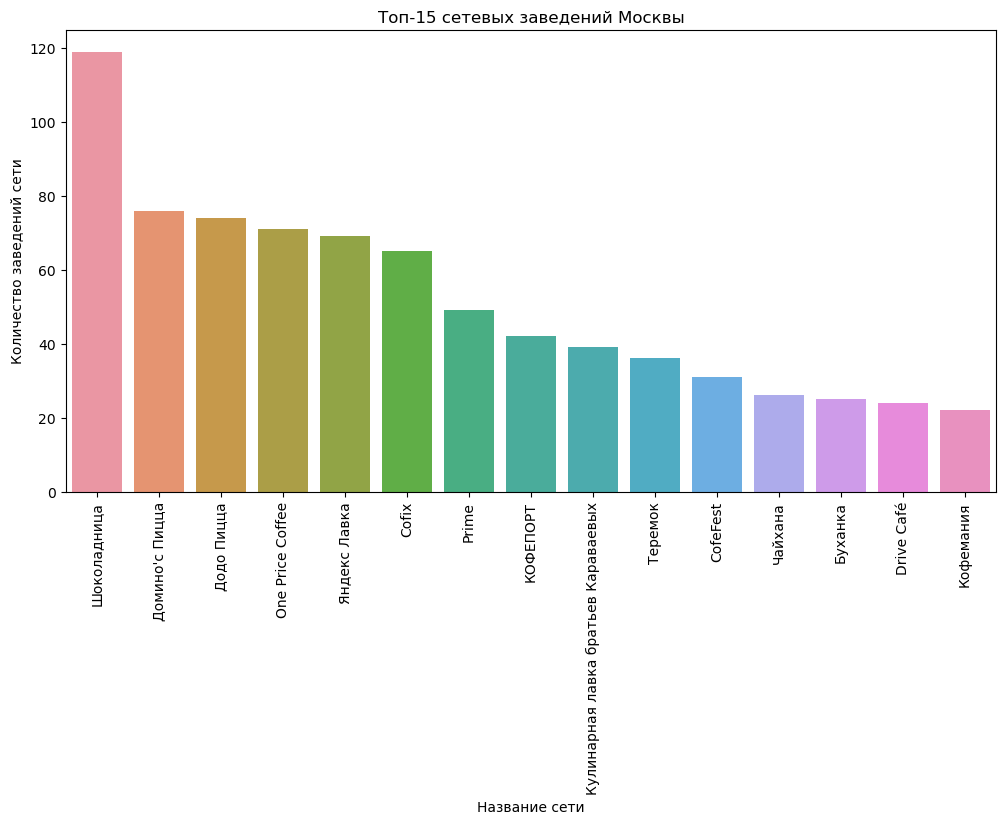

In [23]:
# удаляем лишний уровень индекса
top_chain.index = top_chain.index.droplevel([1])
# строим график топ 15
plt.figure(figsize=(12,6))
top_chain = top_chain.sort_values(by='count', ascending = False).head(15)
sns.barplot(x=top_chain.index,y='count',data=top_chain)
plt.title('Топ-15 сетевых заведений Москвы')
plt.xlabel('Название сети') 
plt.ylabel('Количество заведений сети')
plt.xticks(rotation=90)
plt.show()

* Среди топ-15  сетевых заведений наиболее многочисленны кофейни, второе и третье место делят рестораны и кафе. Абсолютным лидеров по количеству заведений является кофейня "Шоколадница"

### География объектов питания <a id='locality'></a>

In [24]:
#группируем данные по району и категории
bx=data.groupby(['district','category']).agg({'name': 'count'})
bx.columns=['count']
#преобразуем мультииндекс в столбец
bx.reset_index(inplace= True , level = [1])
bx.reset_index(inplace= True , level = [0])


In [25]:
#добавляем столбец с краткими названиями округов
def dist(row):
    if 'Северо-Восточный административный округ' in row['district'] :
        return 'СВАО'
    elif 'Северо-Восточный административный округ' in row['district'] :
        return 'СВАО'
    elif 'Северо-Западный административный округ' in row['district'] :
        return 'СЗАО'
    elif 'Юго-Восточный административный округ' in row['district'] :
        return 'ЮВАО'
    elif 'Юго-Западный административный округ' in row['district'] :
        return 'ЮЗАО'
    elif 'Восточный административный округ' in row['district'] :
        return 'ВАО'
    elif 'Западный административный округ' in row['district'] :
        return 'ЗАО'
    elif 'Северный административный округ' in row['district'] :
        return 'САО'
    
    elif 'Центральный административный округ' in row['district'] :
        return 'ЦАО'
       
    elif 'Южный административный округ' in row['district'] :
        return 'ЮАО'
    else:
        return 'alarm'
bx['dist'] =bx.apply(dist, axis=1)


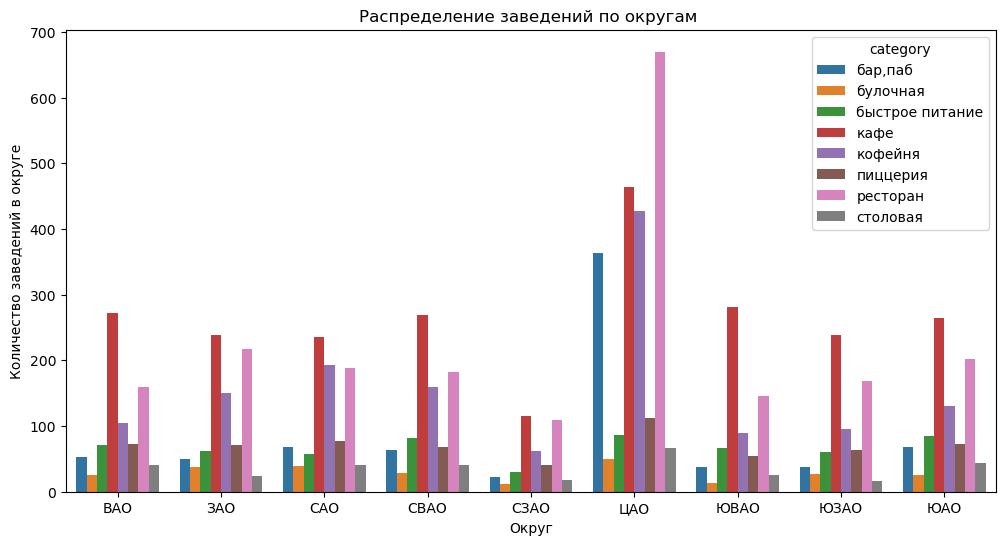

In [26]:
# строим стобчатый график
plt.figure(figsize=(12,6))
sns.barplot(x='dist',y='count',data=bx,hue="category")
plt.title('Распределение заведений по округам ')
plt.xlabel('Округ') 
plt.ylabel('Количество заведений в округе')
plt.xticks(rotation=0)
plt.show()


* Наибольшее количество заведений расположено в Центральномй административном округе, наименьшее в Северо-Западном административном округе. В остальных округах количество заведений примерно равно.

### Распределение средних рейтингов по категориям заведений <a id='rating'></a>

In [27]:
# считаем средний рейтинг заведений по категориям
data.groupby('category').agg({'rating': 'mean'}).sort_values(by='rating', ascending = False)

rating
category                 
бар,паб          4.387712
пиццерия         4.301264
ресторан         4.290357
кофейня          4.277282
булочная         4.268359
столовая         4.211429
кафе             4.123886
быстрое питание  4.050249

* Средние рейтинги по категориям заведений распределены с незначительными колебаниями. Самый высокий средний рейтинг у категории "бар,паб", Самый низкий средний рейтинг в категории "быстрое питание"

### Фоновая картограмма (хороплет) со средним рейтингом заведений каждого района <a id='choropleth_rating'></a>

In [28]:
# группируем данные по округам считая средний рейтинг
rating_data = data.groupby('district', as_index=False)['rating'].agg('mean')


In [ ]:

# загружаем JSON-файл с границами округов Москвы
try:
    with open("C:/Users/user/Desktop/Практикум/проект Рынок заведений/admin_level_geomap.geojson", 'r', encoding='UTF-8') as f:
        state_geo  = json.load(f)
except:
    state_geo = '/datasets/admin_level_geomap.geojson'

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=9.5)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_data,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

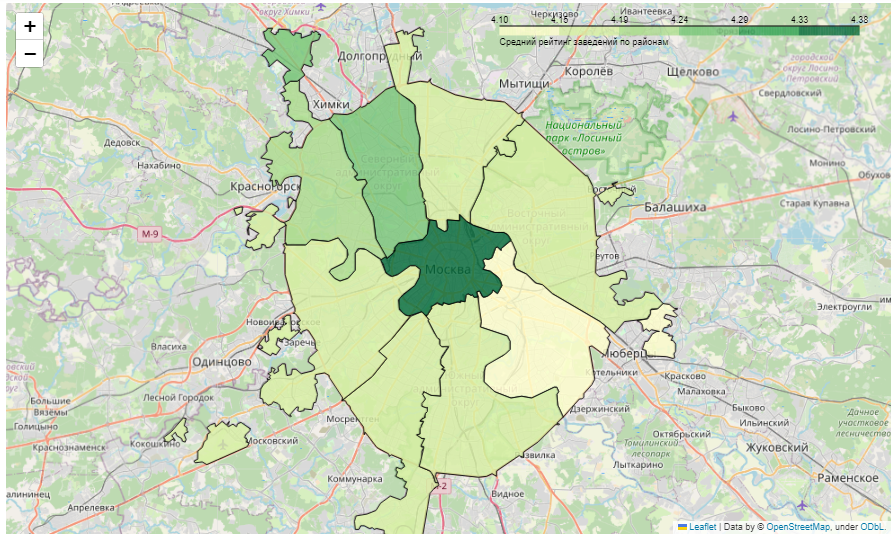

### Карта заведений  <a id='map'></a>

In [ ]:
m_m = Map(location=[moscow_lat, moscow_lng], zoom_start=9)
marker_cluster = MarkerCluster().add_to(m_m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
data.apply(create_clusters, axis=1)

# выводим карту
m_m

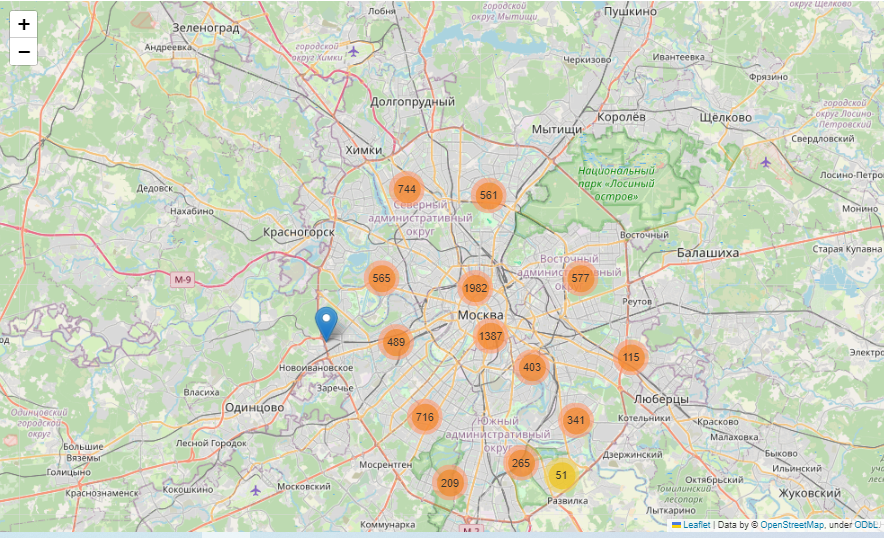

* Центральный административный округ Москвы это историческая чать Москвы, поэтому он является наиболее интересным округом для туристов. Благодаря этому на его территории может существовать количество заведений значительно превышающее другие. Этот же же фактор вкупе с высокой арендной платой в центре (что характерно для абсолютного большинства городов) позволяет выдерживать конкуренцию только высоскоклассным заведениям, что в итоге приводит к более высоким средним оценкам по сравнению с другими округами

### Топ-15 улиц по количеству заведений <a id='top15_sreet'></a>

In [29]:
# считаем количество заведений на каждой улице, выбираем топ15
cx=data.groupby('street').agg({'name':'count'}).sort_values(by='name', ascending = False).head(15)
cx.columns = ['count']
cx.reset_index(inplace= True )
cx

street  count
0            проспект Мира    184
1        Профсоюзная улица    122
2     проспект Вернадского    108
3       Ленинский проспект    107
4   Ленинградский проспект     95
5        Дмитровское шоссе     88
6          Каширское шоссе     77
7         Варшавское шоссе     76
8      Ленинградское шоссе     70
9                     МКАД     65
10        Люблинская улица     60
11          улица Вавилова     55
12    Кутузовский проспект     54
13    улица Миклухо-Маклая     49
14         Пятницкая улица     48

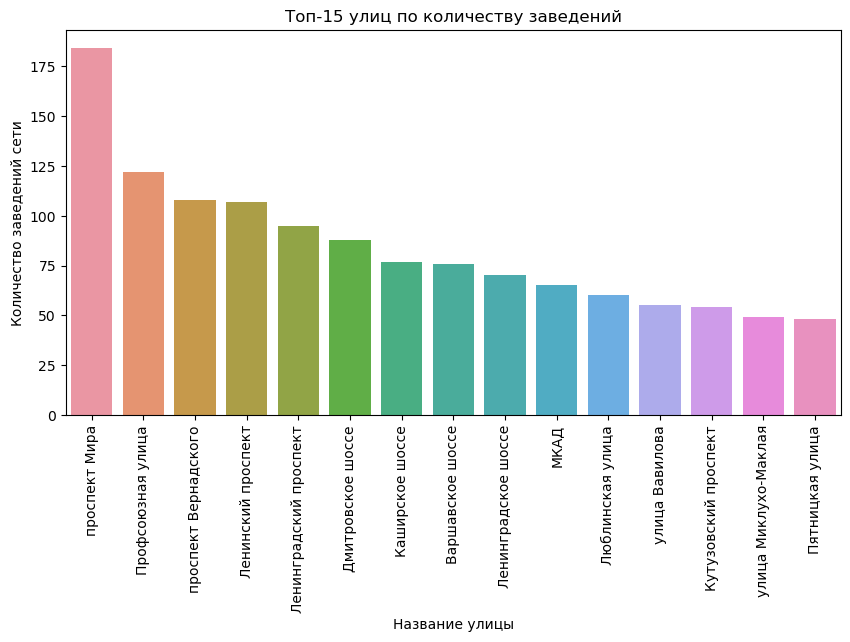

In [30]:
#  строим график топ 15 улиц
plt.figure(figsize=(10,5))
sns.barplot(x='street',y='count',data=cx)
plt.title('Топ-15 улиц по количеству заведений')
plt.xlabel('Название улицы') 
plt.ylabel('Количество заведений сети')
plt.xticks(rotation=90)
plt.show()

In [31]:
#Делаем срез данных по топ-15
sx=list(cx['street'])
dx= data.query('street in @sx')
#группируем данные по району и категории
dx=dx.groupby(['street','category']).agg({'name': 'count'})
dx.columns=['count']
#преобразуем мультииндекс в столбец
dx.reset_index(inplace= True , level = [1])


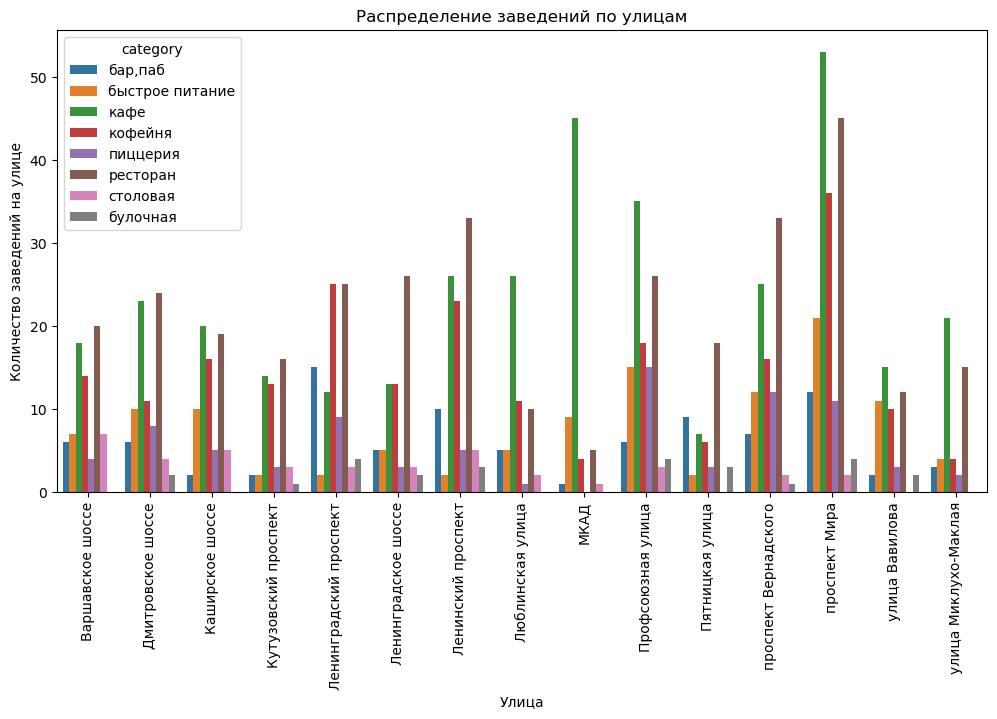

In [32]:
# строим столбчатый график
plt.figure(figsize=(12,6))
sns.barplot(x=dx.index,y='count',data=dx,hue="category")
plt.title('Распределение заведений по улицам')
plt.xlabel('Улица') 
plt.ylabel('Количество заведений на улице')
plt.xticks(rotation=90)
plt.show()


* Несомненным лидером по количествк заведений является проспект Мира - 184шт. На Профсоюзной улице, проспекте вернадского и Ленинском проспекте также можно увидеть значительное количество заведений (более 100шт). Замыкают топ-15 Кутузовский проспект, улица Миклухо-Маклая и Пятницкая улица с количеством заведений от 54 до 48

### Улицы с одним заведением <a id='alone_sreet'></a>

In [33]:
# Делаем срез улиц с 1 заведением
ex=data.groupby('street').agg({'name':'count'})#.sort_values(by='name', ascending = False).head(15)
ex.columns = ['count']
ex.reset_index(inplace= True )
ex=ex.query('count == 1')
# Создаем список улиц
ex=list(ex['street'])
# делаем срез по списку и группируем данные
ex=data.query('street in @ex')
ex=ex.groupby('category').agg({'name':'count'}).sort_values(by='name')
ex.columns = ['count']
ex

count
category              
булочная             8
пиццерия            15
быстрое питание     23
столовая            36
бар,паб             39
кофейня             84
ресторан            93
кафе               160

* На улицах с одним заведением чаще всего встречаются кафе. Также значительное количество заведений среди ресторанов и кофейнь. Остальные заведения встречаются значительно реже, наименьшее количество заведений общественного питания - булочная

### Анализ среднего чека заведения по административным округам <a id='avg_district'></a>

In [34]:
#считаем медиану среднего чека
median_bill=data.groupby('district').agg({'middle_avg_bill':'median'})
median_bill.sort_values(by='middle_avg_bill')


middle_avg_bill
district                                                
Юго-Восточный административный округ               450.0
Северо-Восточный административный округ            500.0
Южный административный округ                       500.0
Восточный административный округ                   575.0
Юго-Западный административный округ                600.0
Северный административный округ                    650.0
Северо-Западный административный округ             700.0
Западный административный округ                   1000.0
Центральный административный округ                1000.0

In [ ]:
# группируем данные
median_bill = data.groupby('district', as_index=False)['middle_avg_bill'].agg('median')
m_median = Map(location=[moscow_lat, moscow_lng], zoom_start=9.5)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=median_bill,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний чек заведений по районам',
).add_to(m_median)

# выводим карту
m_median

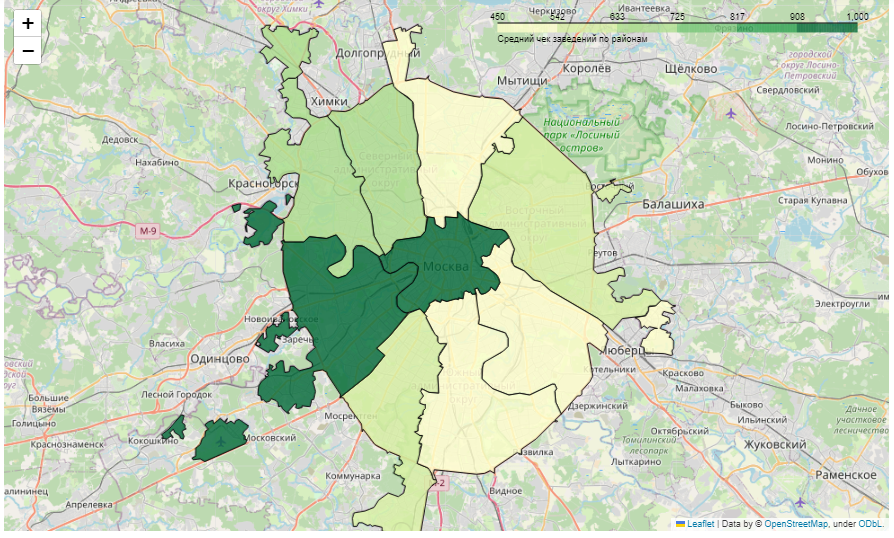

* Наиболее высокий средний чек в Центральном и Западном административных округах. Самый низкий средний чек в Юго-Восточном административном округе. 

In [35]:
# Пишем функцию считающую расстояние от центра до точки и ггруппирующую по группам
def distance(row):
    s = ((55.751244-row['lat'])**2+(37.618423-row['lng'])**2)**0.5*100
    if s<1:
        return '.менее 1 км '
    elif 1<=s<3:
        return '1-3 км'
    elif 3<=s<6: 
        return '3-6 км'
    elif 6<=s<12:
        return '6-12 км'
    elif s>=12:
        return 'более 12 км'
# присоединяем новый столбец    
data['dist'] = data.apply(distance, axis=1)


In [36]:
# Смотрим распределение средних чеков в завсисимости от расстояния до центра
fx=data.groupby('dist')
fx=data.groupby('dist').agg({'middle_avg_bill':'median'})#.sort_values(by='name', ascending = False).head(15)
fx.columns = ['median']
fx.reset_index(inplace= True )
fx

dist  median
0  .менее 1 км   1150.0
1        1-3 км  1200.0
2        3-6 км   850.0
3       6-12 км   600.0
4   более 12 км   600.0

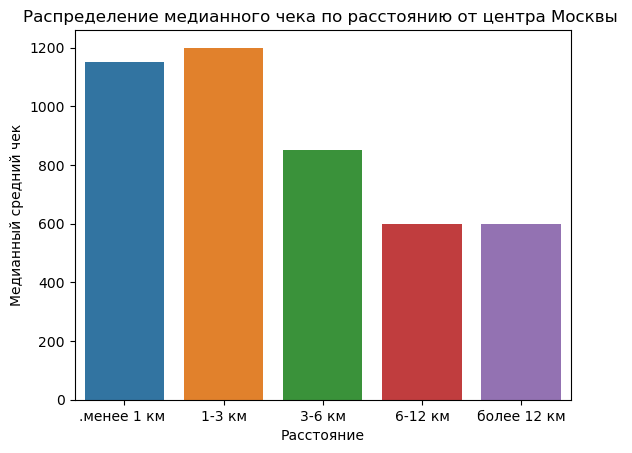

In [37]:
#строим график зависимости чека от расстояния
sns.barplot(x='dist',y='median',data=fx)
plt.title('Распределение медианного чека по расстоянию от центра Москвы ')
plt.xlabel('Расстояние') 
plt.ylabel('Медианный средний чек')
#plt.xticks(rotation=90)
plt.show()

* Можно выделить снижение медианного среднего чека в зависимости от расстояния от центра города

### Зависимость среднего чека и рейтинга заведения <a id='avg_rating'></a>

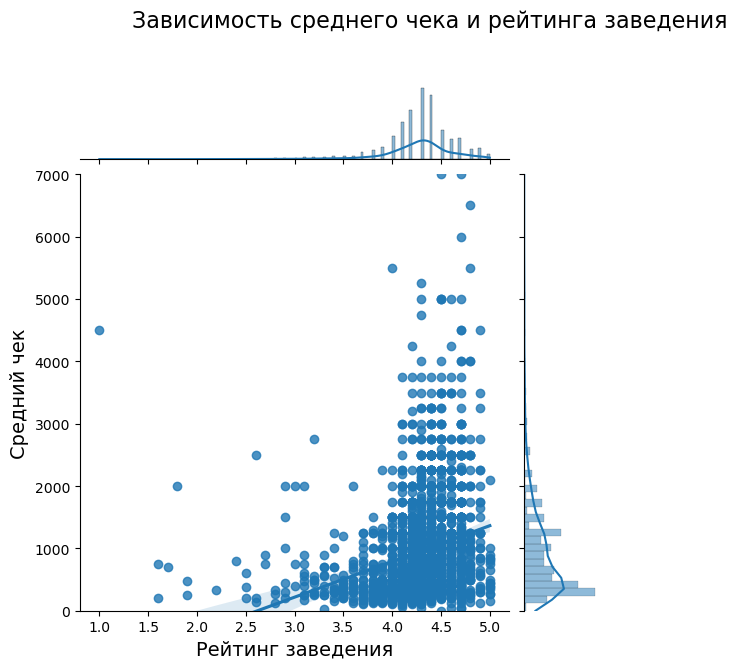

In [38]:
# строим график зависимости чека от рейтинга, ограничиваем чек для большей наглядности
jp = sns.jointplot(y='middle_avg_bill', x='rating', data=data, kind='reg')
jp.set_axis_labels(xlabel="Рейтинг заведения", ylabel="Средний чек", fontsize=14)
jp.fig.suptitle("Зависимость среднего чека и рейтинга заведения ", fontsize=16,x=0.7, y=1.1)
plt.ylim([0, 7000])
plt.show()

* По графику можно сделать вывод, что у заведений с низким рейтингом средний чек меньше, че у заведений с высоким рейтингом. Но данная зависимость работает линейно для заведений с рейтингом меньше 4,3 балла. можно предположить что заведения с большим рейтингом получают хорошие оценки не только за качество еды.напитков, но также оказывает влияние социально-эстетическая составляющая: оформление зала, вид из заведения, отношение к постоянным клиентам и т.п.

### Вывод <a id='output'></a>

В резудьтате анализа данных можно установить следующие закономерности:
* Наиболее распространены  заведений категорий: кафе, ресторан, кофейня
* Среднее количество мест варьируется от 50 до 86, в зависимости от категории заведения
* Доля несетевых заведений составляет около 62%
* Наибольший процент сетевых заведений встречается среди: булочная, пиццерия, кофейня
* Лидером по количеству заведений является кофейня "Шоколадница"
* Наибольшее количество заведений расположено в Центральномй административном округе, наименьшее в Северо-Западном административном округе
* Самый высокий средний рейтинг у категории "бар,паб", Самый низкий средний рейтинг в категории "быстрое питание"
* Лидером по количеству заведений является проспект Мира - 184шт
* На улицах с одним заведением чаще всего встречаются кафе
* Наиболее высокий средний чек в Центральном и Западном административных округах. Самый низкий средний чек в Юго-Восточном административном округе
* Можно выделить снижение медианного среднего чека в зависимости от расстояния от центра города
* У заведений с низким рейтингом средний чек меньше, чем у заведений с высоким рейтингом

## Детализация исследование: открытие кофейни  <a id='open'></a>

In [39]:
# Смотрим общее количество кофеен
coff = data.query('category == "кофейня"')
print('Всего кофеен на территории Москвы:',coff['name'].count())

Всего кофеен на территории Москвы: 1413


In [40]:
# Смотрим распределение кофеен по округам
gx = coff.groupby('district').agg({'name':'count'}).sort_values(by='name')
gx.reset_index(inplace= True )
gx

district  name
0   Северо-Западный административный округ    62
1     Юго-Восточный административный округ    89
2      Юго-Западный административный округ    96
3         Восточный административный округ   105
4             Южный административный округ   131
5          Западный административный округ   150
6  Северо-Восточный административный округ   159
7          Северный административный округ   193
8       Центральный административный округ   428

In [ ]:
# создаем карту
coff_m = Map(location=[moscow_lat, moscow_lng], zoom_start=9)
marker_cluster = MarkerCluster().add_to(coff_m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
coff.apply(create_clusters, axis=1)

# выводим карту
coff_m

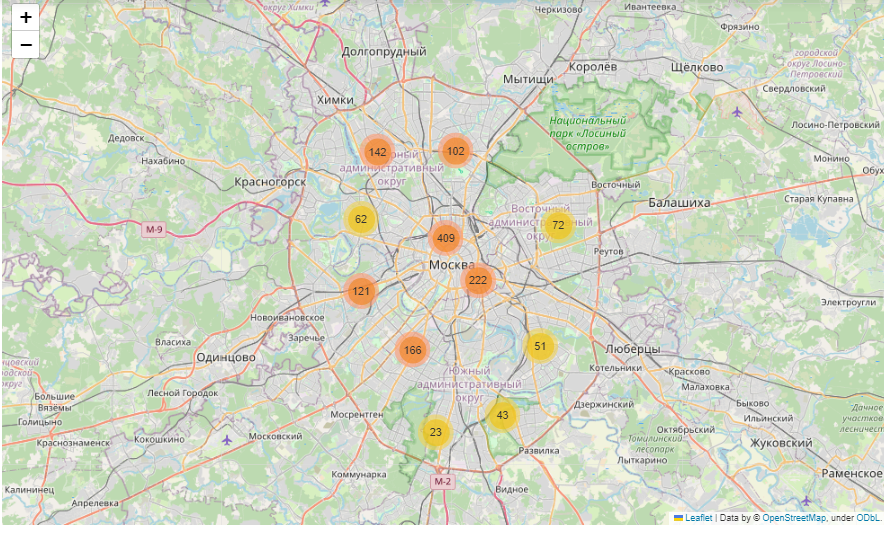

In [ ]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
coff_m = Map(location=[moscow_lat, moscow_lng], zoom_start=9.5)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=gx,
    columns=['district', 'name'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Количество заведений в онруге',
).add_to(coff_m)

# выводим карту
coff_m

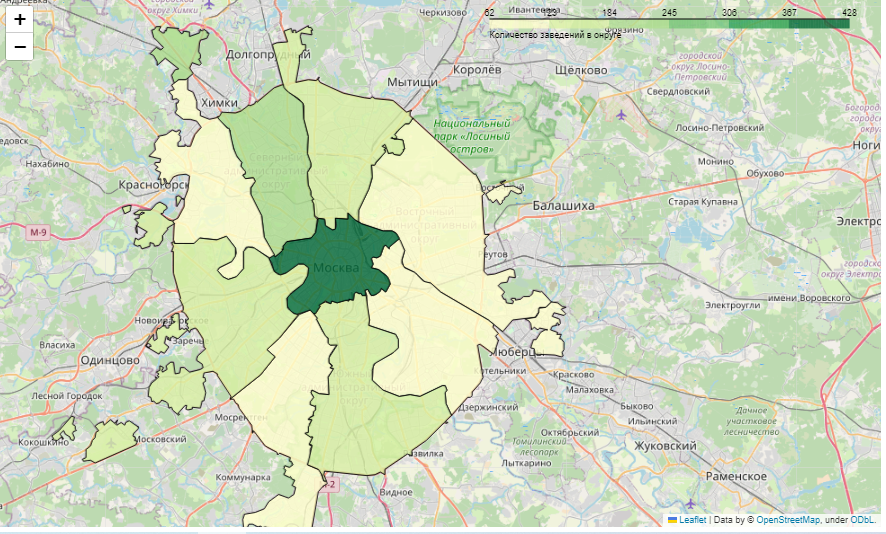

In [41]:
# Смотрим график работы кофеен
coff['24/7'].value_counts()/coff['name'].count()

False    0.958245
True     0.041755
Name: 24/7, dtype: float64

* Среди кофеен 4,1% заведений работают в круглосуточном режиме

In [42]:
# смотрим рейтинг кофеен по районам
coff.groupby('district').agg({'rating':'mean'}).sort_values(by='rating')

rating
district                                         
Западный административный округ          4.195333
Северо-Восточный административный округ  4.216981
Юго-Восточный административный округ     4.225843
Южный административный округ             4.232824
Восточный административный округ         4.282857
Юго-Западный административный округ      4.283333
Северный административный округ          4.291710
Северо-Западный административный округ   4.325806
Центральный административный округ       4.336449

In [43]:
# Смотрим медианную стоимость чашки кофе по округам
px=coff.groupby('district').agg({'middle_coffee_cup':'median'}).sort_values(by='middle_coffee_cup')
px

middle_coffee_cup
district                                                  
Восточный административный округ                     135.0
Юго-Восточный административный округ                 147.5
Южный административный округ                         150.0
Северный административный округ                      159.0
Северо-Восточный административный округ              162.5
Северо-Западный административный округ               165.0
Западный административный округ                      189.0
Центральный административный округ                   190.0
Юго-Западный административный округ                  198.0

* В связи с тем что кофейня планируется доступной, то стоимость чашки кофе не должна превышать медианную по выбранному району.

## Вывод <a id='conclusion'></a>

Для открытия новой кофейни можно рассмотреть несколько округов Москвы Северо-Западный административный округ, Юго-Восточный административный округ, Юго-Западный административный округ, Восточный административный округ. В этих округах количество кофеен значительно ниже остальных. Средний рейтинг кофеен ниже всего в Юго-Восточном административном округе. Что делает его лидером для выбора в cвязи с более простыми условиями конкуренции.  Формат кофейни аналогичной «Central Perk» из сериала «Друзья», подразумевает что основными клиентами заведения являются  молодые специалисты недавно окончившие учебу и не имеющие семьи в возпасте примерно от 22 до 30 лет. Также к целевой аудитории можно отнести старшие курсы учебных заведений. Исходя из этих факторов местоположение кафе рекомендуется размещать в  спальных районах, удаленных от центра города. В таких районах квартиры могут позволить себе приобрести целевая аудитория из молодых специалистов, желательно выбирать вновь построенные районы чтобы  средний возраст жильцов был ближе к целевой аудитории. Если ориентироваться на студентов старших курсов то рекомендуется расположить кофейню вблизи общетия одного из вузов столицы.